# Kmeans-part2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.preprocessing import MinMaxScaler

# Create dataframe of x, y and label values
X, y = make_blobs(n_samples=10000, centers=3, n_features=3, cluster_std=1.5)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X
df = pd.DataFrame(dict(x=X_scaled[:,0], y=X_scaled[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green', 3 : 'black'}

# fig, ax = plt.subplots()
# grouped = df.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# plt.show()   

In [25]:
df.to_csv('data_sample.csv')

In [23]:
points = df.drop('label', axis=1)
points.head()

,x,y
0,10.418510,-9.208242
1,7.729491,1.397775
2,-12.985973,5.300755
3,8.128572,-3.424609
4,5.971099,-5.586684


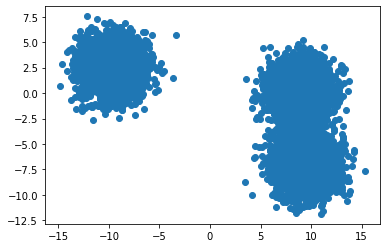

In [24]:
# Scatter plot of our label-less data
plt.scatter(points.x, points.y)
plt.show()

## WCV

In [ ]:
from sklearn.cluster import KMeans 

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_) # WCV 


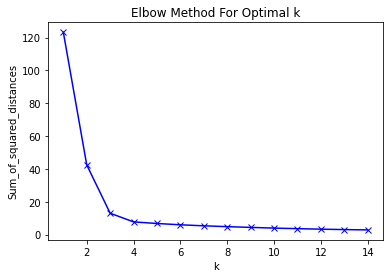

In [ ]:
# Plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 

In [ ]:
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

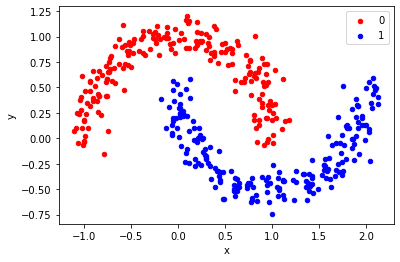

In [ ]:
from sklearn.datasets import make_moons

# Sample
X, y = make_moons(n_samples=400, noise=0.1)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()  



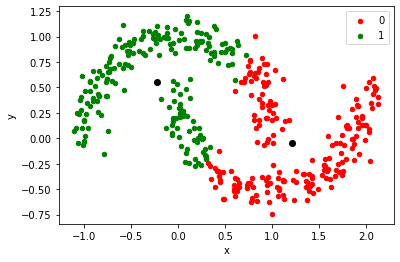

In [ ]:
# Dùng Kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
df['clusters'] = kmeans.labels_
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,
        0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  0,  0,
        1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  1,  1

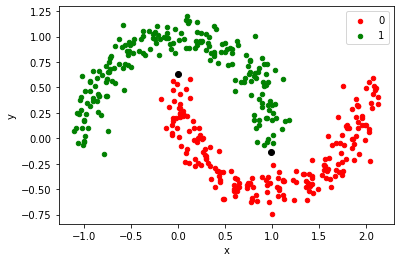

In [ ]:
import numpy as np
df['clusters'] = np.where(dbscan.labels_ ==-1, 1, dbscan.labels_) # replace label = -1
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)


## Bài tập:

1. Code lại WCV

2. Code các công thức distance sau 

d là distance ( theo euclid) # cdist ( bài thực hành trước)

*   single: $d(C_{1}, C_{2}) = \min_{x_1\in C_1, x_2 \in C_2}{d(x_1,x_2)}$
*   complete : $d(C_{1}, C_{2}) = \max_{x_1\in C_1, x_2 \in C_2}{d(x_1,x_2)}$
*   average : $d(C_{1}, C_{2}) = \frac{1}{|C_1|} \frac{1}{|C_2|} \sum_{x_1 \in C_1} \sum_{x_2\in C_2} d(x_1, x_2)$

Khuyến khích dùng numpy.



In [ ]:
C_1 = [1,2,3,4]
C_2 = [5,6,7,8]

# single:

# d(x1, x2) = |x1 - x2|  # Trong không gian 1 chiều.

# x1(a,b,m) , x2 (c,d,n)

# d(x1, x2) = sqrt((a-c)**2 + (b-d)**2 + (m-x) **2 )

In [ ]:
def single(C_1, C_2):

    '''
    .... 

    input:
        C_1 : 
        C_2 : 

    ouput:
        ....
    '''

    list_result = []

    for i in C_1: 
        for j in C_2:
            list_result.append(abs(i-j)) # abs thay bằng 1 function tính d(x1, x2)

    return min(list_result)

import math
def single_v2(C_1, C_2):
    list_result = []

    for i in C_1: 
        for j in C_2:
            result = 0
            for index in range(2):
                result += (i[index] - j[index]) ** 2

            list_result.append(math.sqrt(result))

    return min(list_result)


In [ ]:
C_1 = [1,2,3,4]
C_2 = [5,6,7,8]
print(single(C_1, C_2))

1


In [ ]:
# single_v2
C_1 = [(1,1), (1,2)]
C_2 = [(0,0), (0,1)]
single_v2(C_1, C_2)

1.0